In [1037]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1038]:
def calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None):
    
    ground_truth = pd.read_csv(ground_truth_csv, sep=';', engine='python')
    model_answers = pd.read_csv(model_csv, sep=',', engine='python')
    
    ground_truth = ground_truth.iloc[:, start_col:end_col]
    #print(ground_truth.columns)
    model_answers = model_answers.iloc[:, start_col:end_col]
    
    total_questions = ground_truth.shape[1]
        
    correct_answers = (ground_truth == model_answers).astype(float)
    row_scores = correct_answers.sum(axis=1) / total_questions
    
    overall_accuracy = (row_scores.sum() / len(row_scores)) * 100
    
    return row_scores.tolist(), overall_accuracy


In [1039]:
def lista_a_diccionario(lista):
    diccionario = {f"{i+1}": valor for i, valor in enumerate(lista)}
    return diccionario

In [1040]:
def graficar_accuracy_multiple(combinaciones_acc, acc_por_imagen):
    sns.set(style="whitegrid")  # Estilo limpio para gráficos

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    df_acc = pd.DataFrame({
        "Modelo": list(combinaciones_acc.keys()),
        "Accuracy": list(combinaciones_acc.values())
    })
    sns.barplot(data=df_acc, x="Modelo", y="Accuracy", ax=axes[0, 0], hue="Modelo", dodge=False, palette="Blues")
    axes[0, 0].set_title("Comparación de Accuracy por Modelo (Vertical)")
    axes[0, 0].set_xlabel("Modelo")
    axes[0, 0].set_ylabel("Accuracy")

    df_img_acc = pd.DataFrame({"Imagen": list(acc_por_imagen.keys()), "Accuracy": list(acc_por_imagen.values())})
    sns.histplot(df_img_acc["Accuracy"], bins=10, kde=True, ax=axes[0, 1], color="green")
    axes[0, 1].set_title("Histograma del Accuracy por Imagen")
    axes[0, 1].set_xlabel("Accuracy")
    axes[0, 1].set_ylabel("Frecuencia")
    axes[0, 1].legend(labels=["Distribución KDE"], loc="upper right")

    sns.boxplot(data=df_img_acc, x="Accuracy", ax=axes[1, 0], color="orange")
    axes[1, 0].set_title("Boxplot del Accuracy por Imagen (Horizontal)")
    axes[1, 0].set_xlabel("Accuracy")

    mejores = df_img_acc.nlargest(4, "Accuracy")
    peores = df_img_acc.nsmallest(4, "Accuracy")
    resumen = pd.concat([mejores, peores])
    sns.barplot(data=resumen, x="Accuracy", y="Imagen", ax=axes[1, 1], hue="Imagen", dodge=False, palette="coolwarm")
    axes[1, 1].set_title("Top 4 Mejores y Peores Imágenes por Accuracy")
    axes[1, 1].set_xlabel("Accuracy")
    axes[1, 1].set_ylabel("Imagen")

    plt.tight_layout()
    plt.show()


### 5xl

In [1041]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip2_t5_pretrain_flant5xl_3187.csv'

In [1042]:
try:
    row_accuracies_5xl, overall_accuracy_5xl = calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None)
    print(f"Accuracy total promedio: {overall_accuracy_5xl:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio: 87.90%


In [1043]:
try:
    _, sub_accuracy_5xl = calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10)
    print(f"Accuracy total promedio Solo sección de sujetos: {sub_accuracy_5xl:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de sujetos: 99.70%


In [1044]:
try:
    _, act_accuracy_5xl = calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12)
    print(f"Accuracy total promedio Solo sección de actividades: {act_accuracy_5xl:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de actividades: 97.92%


In [1045]:
try:
    _, context_accuracy_5xl = calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None)
    print(f"Accuracy total promedio Solo seccion de contextualización: {context_accuracy_5xl:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo seccion de contextualización: 79.44%


In [1046]:
accuracy_combinaciones = {
    "Total": overall_accuracy_5xl,
    "Peron": sub_accuracy_5xl,
    "Activity": act_accuracy_5xl,
    "Context": context_accuracy_5xl
} 

accuracy_por_imagen = lista_a_diccionario(row_accuracies_5xl)

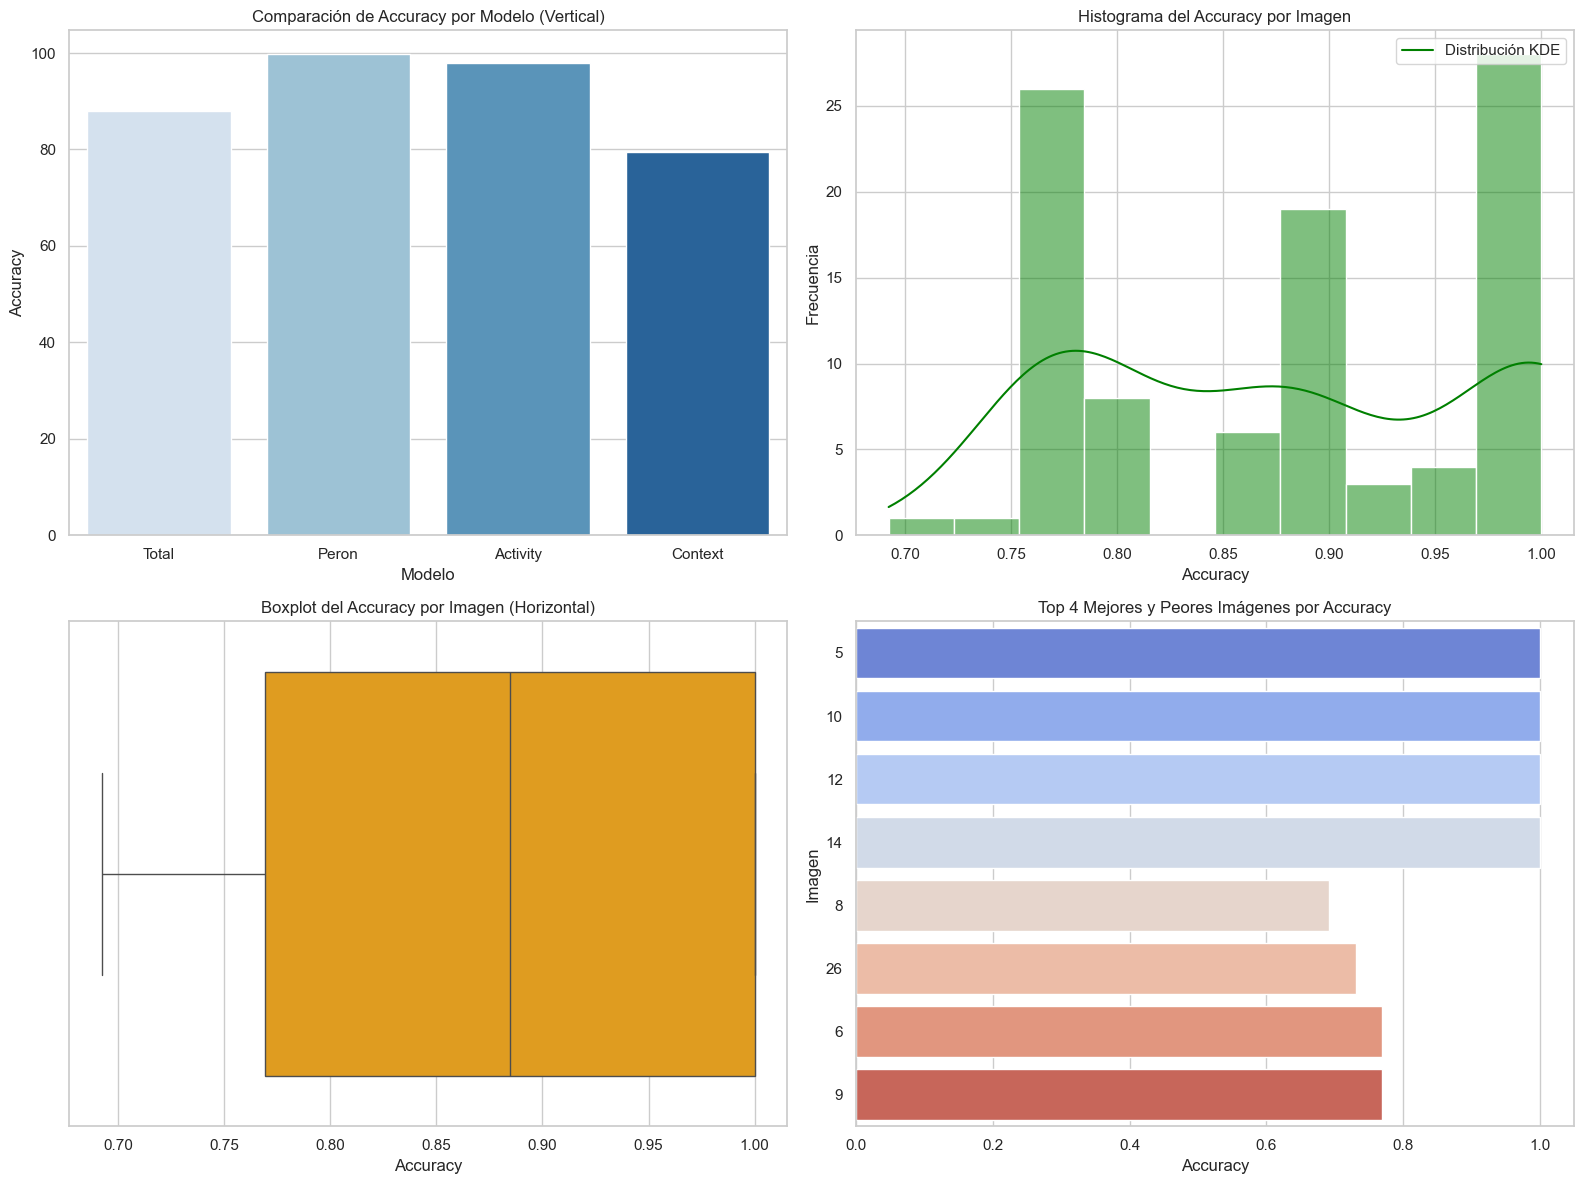

In [1047]:
graficar_accuracy_multiple(accuracy_combinaciones, accuracy_por_imagen)

### Coco OPT 27b

In [1048]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip2_opt_caption_coco_opt2.7b_3337.csv'

In [1049]:
try:
    row_accuracies_27b, overall_accuracy_27b = calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None)
    print(f"Accuracy total promedio: {overall_accuracy_27b:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio: 57.61%


In [1050]:
try:
    _, sub_accuracy_27b = calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10)
    print(f"Accuracy total promedio Solo sección de sujetos: {sub_accuracy_27b:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de sujetos: 11.90%


In [1051]:
try:
    _, act_accuracy_27b = calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12)
    print(f"Accuracy total promedio Solo sección de actividades: {act_accuracy_27b:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de actividades: 5.21%


In [1052]:
try:
    _, context_accuracy_27b = calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None)
    print(f"Accuracy total promedio Solo seccion de contextualización: {context_accuracy_27b:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo seccion de contextualización: 80.28%


In [1053]:
accuracy_combinaciones = {
    "Total": overall_accuracy_27b,
    "Peron": sub_accuracy_27b,
    "Activity": act_accuracy_27b,
    "Context": context_accuracy_27b
}

accuracy_por_imagen = lista_a_diccionario(row_accuracies_5xl)

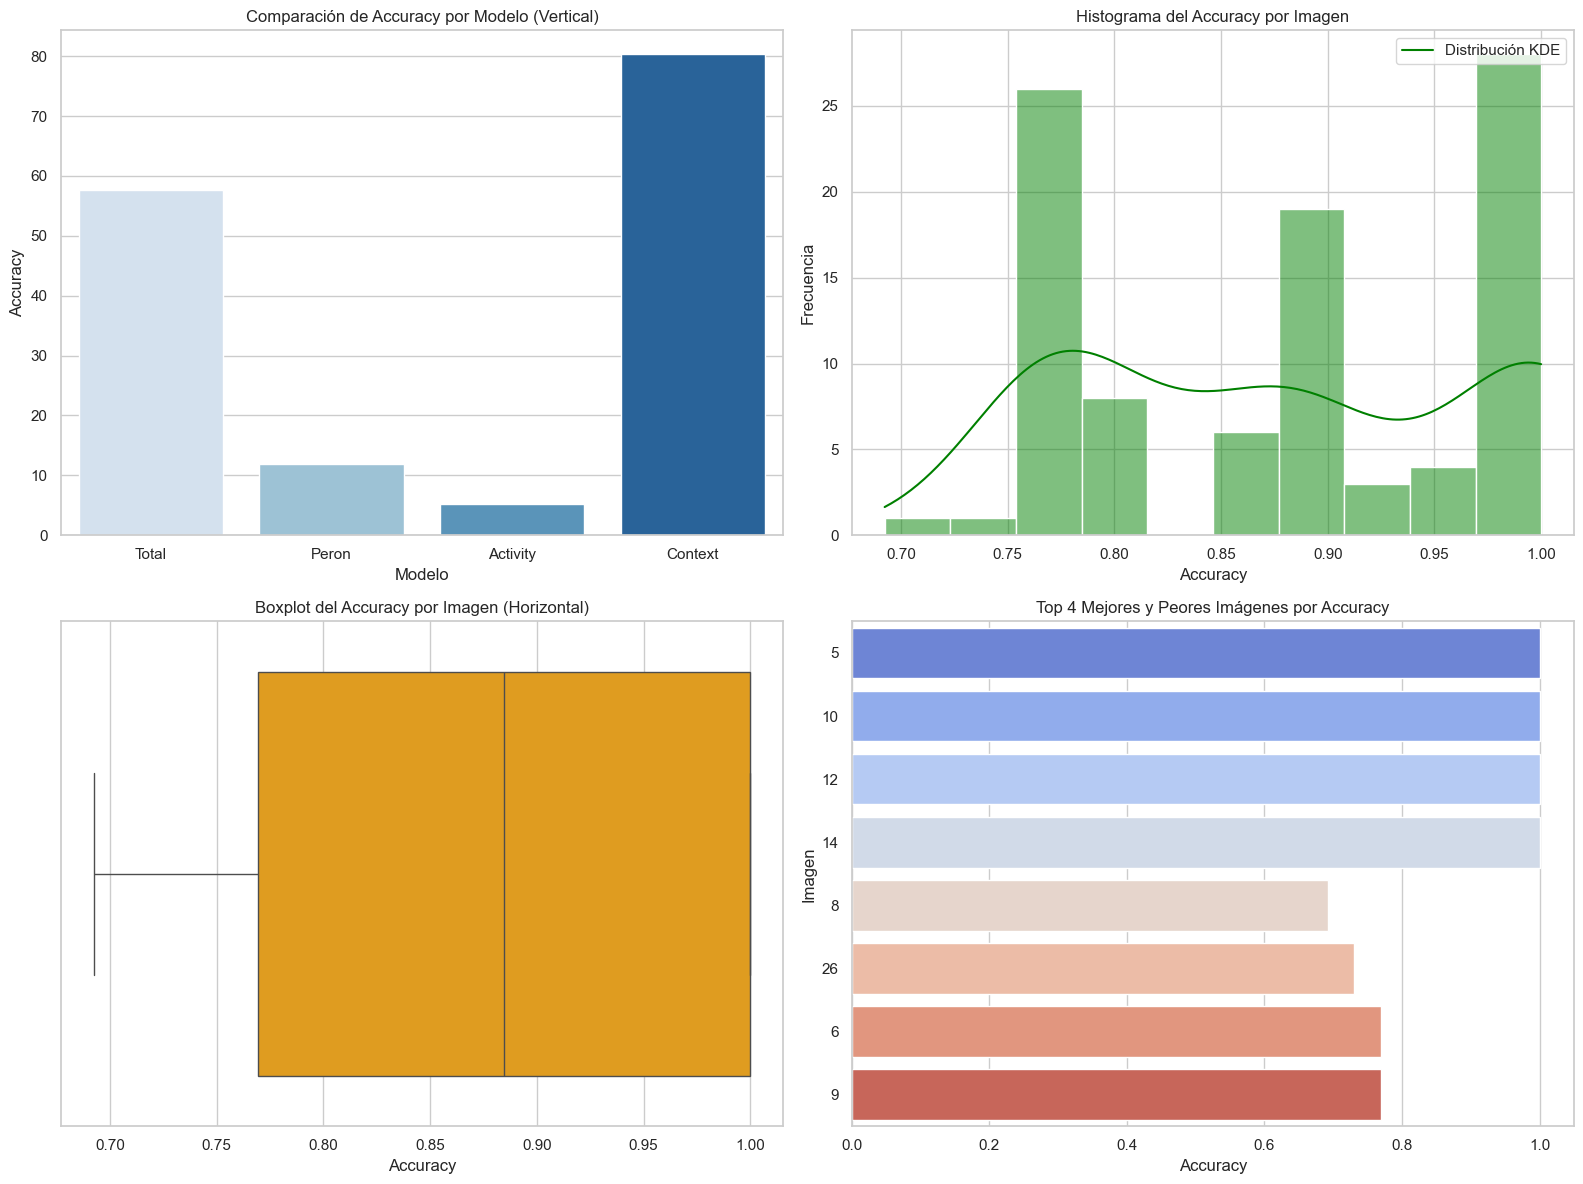

In [1054]:
graficar_accuracy_multiple(accuracy_combinaciones, accuracy_por_imagen)

### Vqav2

In [1055]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/blip_vqa_vqav2_9444.csv'

In [1056]:
try:
    row_accuracies_v2, overall_accuracy_v2 = calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None)
    print(f"Accuracy total promedio: {overall_accuracy_v2:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio: 18.23%


In [1057]:
try:
    _, sub_accuracy_v2 = calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10)
    print(f"Accuracy total promedio Solo sección de sujetos: {sub_accuracy_v2:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de sujetos: 30.36%


In [1058]:
try:
    _, act_accuracy_v2 = calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12)
    print(f"Accuracy total promedio Solo sección de actividades: {act_accuracy_v2:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de actividades: 27.60%


In [1059]:
try:
    _, context_accuracy_v2 = calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None)
    print(f"Accuracy total promedio Solo seccion de contextualización: {context_accuracy_v2:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo seccion de contextualización: 0.42%


In [1060]:
accuracy_combinaciones = {
    "Total": overall_accuracy_v2,
    "Peron": sub_accuracy_v2,
    "Activity": act_accuracy_v2,
    "Context": context_accuracy_v2
}

accuracy_por_imagen = lista_a_diccionario(row_accuracies_v2)

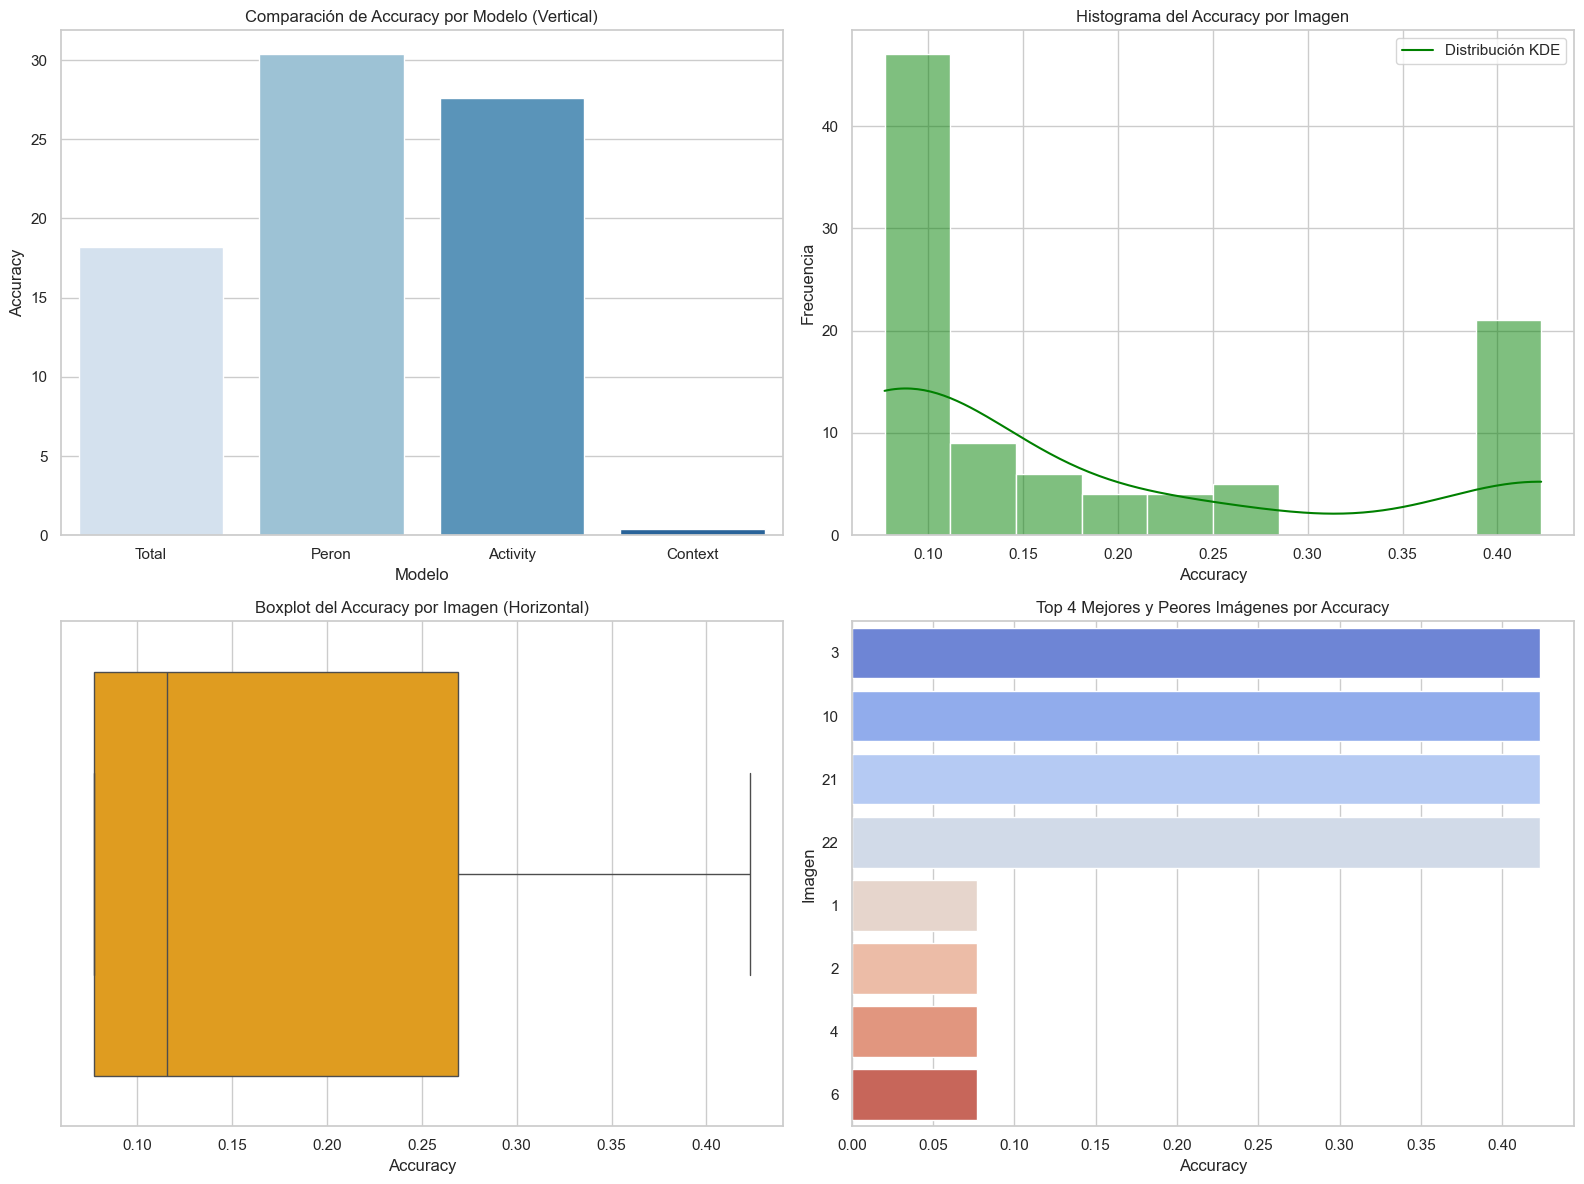

In [1061]:
graficar_accuracy_multiple(accuracy_combinaciones, accuracy_por_imagen)

### Vqa Base

In [1062]:
ground_truth_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/Results_definitive.csv'
model_csv = 'C:/Users/usuario/Desktop/Photo_Categorization/photoCategorization/data/results3/pnp_vqa_base_6558.csv'

In [1063]:
try:
    row_accuracies_base, overall_accuracy_base = calculate_accuracy(ground_truth_csv, model_csv, start_col=1, end_col=None)
    print(f"Accuracy total promedio: {overall_accuracy_base:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio: 75.64%


In [1064]:
try:
    _, sub_accuracy_base = calculate_accuracy(ground_truth_csv, model_csv, start_col=3, end_col=10)
    print(f"Accuracy total promedio Solo sección de sujetos: {sub_accuracy_base:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de sujetos: 67.86%


In [1065]:
try:
    _, act_accuracy_base = calculate_accuracy(ground_truth_csv, model_csv, start_col=10, end_col=12)
    print(f"Accuracy total promedio Solo sección de actividades: {act_accuracy_base:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo sección de actividades: 66.67%


In [1066]:
try:
    _, context_accuracy_base = calculate_accuracy(ground_truth_csv, model_csv, start_col=12, end_col=None)
    print(f"Accuracy total promedio Solo seccion de contextualización: {context_accuracy_base:.2f}%")
except Exception as e:
    print(f"Error: {e}")

Accuracy total promedio Solo seccion de contextualización: 77.22%


In [1067]:
accuracy_combinaciones = {
    "Total": overall_accuracy_base,
    "Peron": sub_accuracy_base,
    "Activity": act_accuracy_base,
    "Context": context_accuracy_base
}

accuracy_por_imagen = lista_a_diccionario(row_accuracies_v2)

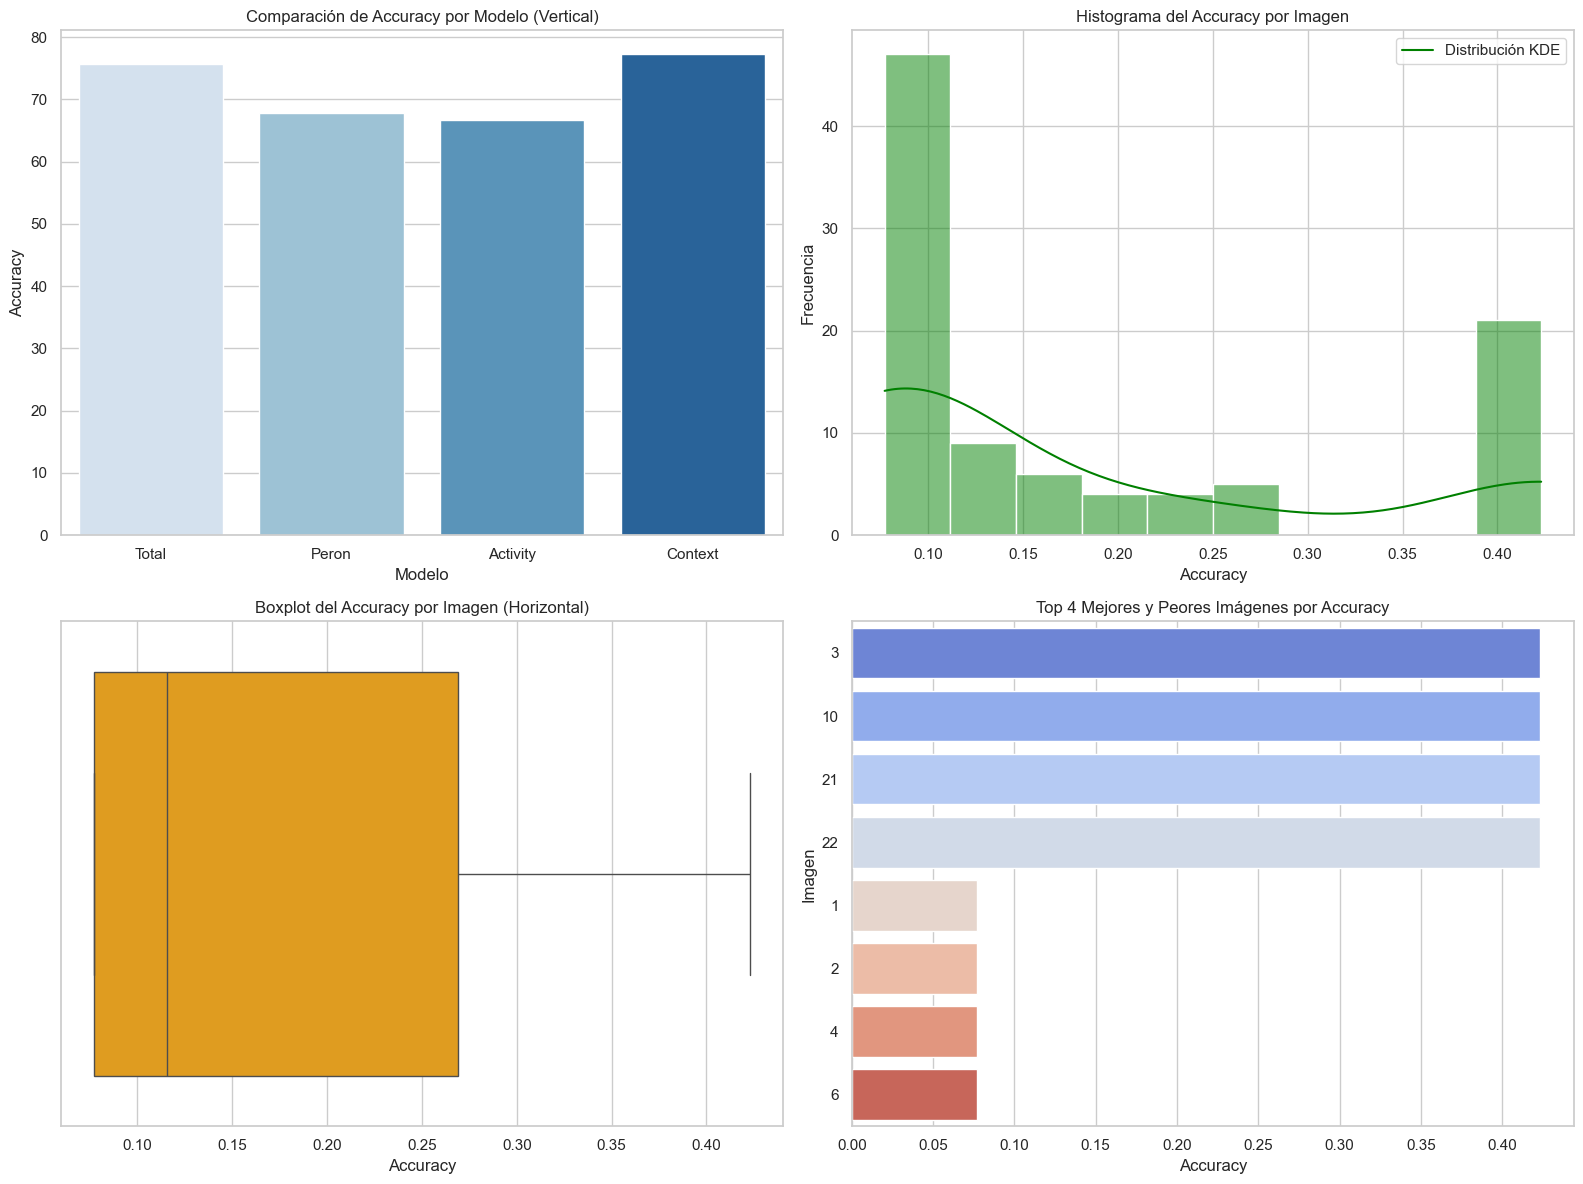

In [1069]:
graficar_accuracy_multiple(accuracy_combinaciones, accuracy_por_imagen)